In [99]:
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchvision import transforms
from torchvision.datasets import CocoDetection
from torch.utils.data import DataLoader

In [117]:
class ResizeTransform:
    def __init__(self, new_width, new_height, instances=False): # instances if using bounding boxes set
        self.new_width = new_width
        self.new_height = new_height
        self.instances = instances

    def __call__(self, image, target):
        original_width, original_height = image.size
        scale_w = self.new_width / original_width
        scale_h = self.new_height / original_height

        resized_image = F.resize(image, (self.new_height, self.new_width))

        if self.instances:
            for box in target:
                bbox = box["bbox"]
                new_x_min = bbox[0] * scale_w
                new_y_min = bbox[1] * scale_h
                new_x_max = bbox[2] * scale_w
                new_y_max = bbox[3] * scale_h
                box["bbox"] = [new_x_min, new_y_min, new_x_max, new_y_max]

        return resized_image, target

In [118]:
def resize_and_scale(image, target):
    resize_transform = ResizeTransform(512, 512)
    image, target = resize_transform(image, target)
    image = transforms.ToTensor()(image)
    return image, target

In [119]:
coco_train = CocoDetection(root='images/train2017',
                           annFile='annotations/ann2017/captions_train2017.json',
                           transforms=resize_and_scale)

coco_val = CocoDetection(root='images/val2017',
                         annFile='annotations/ann2017/captions_val2017.json',
                         transforms=resize_and_scale)

loading annotations into memory...
Done (t=1.51s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [120]:
print('Number of samples in train:', len(coco_train))
print('Number of samples in validation:', len(coco_val))

img, target = coco_train[2]
print(target)
print(img.shape, target)

Number of samples in train: 118287
Number of samples in validation: 5000
[{'image_id': 30, 'id': 695774, 'caption': 'A flower vase is sitting on a porch stand.'}, {'image_id': 30, 'id': 696557, 'caption': 'White vase with different colored flowers sitting inside of it. '}, {'image_id': 30, 'id': 699041, 'caption': 'a white vase with many flowers on a stage'}, {'image_id': 30, 'id': 701216, 'caption': 'A white vase filled with different colored flowers.'}, {'image_id': 30, 'id': 702428, 'caption': 'A vase with red and white flowers outside on a sunny day.'}]
torch.Size([3, 512, 512]) [{'image_id': 30, 'id': 695774, 'caption': 'A flower vase is sitting on a porch stand.'}, {'image_id': 30, 'id': 696557, 'caption': 'White vase with different colored flowers sitting inside of it. '}, {'image_id': 30, 'id': 699041, 'caption': 'a white vase with many flowers on a stage'}, {'image_id': 30, 'id': 701216, 'caption': 'A white vase filled with different colored flowers.'}, {'image_id': 30, 'id': 

In [121]:
def show_image(img_tensor, annotation, instances=False):
    fig, ax = plt.subplots(1)
    ax.imshow(img_tensor.permute(1, 2, 0))

    for ann in annotation:
        if instances:
            bbox = ann['bbox']
            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        else:
            print(ann["caption"])

    plt.show()

A flower vase is sitting on a porch stand.
White vase with different colored flowers sitting inside of it. 
a white vase with many flowers on a stage
A white vase filled with different colored flowers.
A vase with red and white flowers outside on a sunny day.


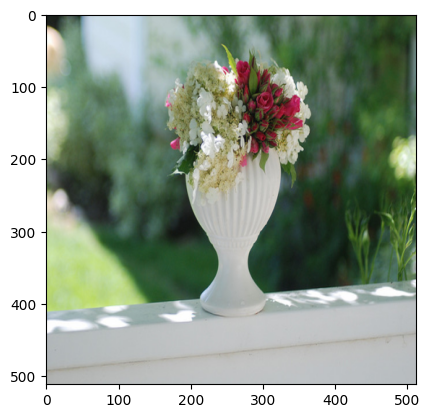

In [122]:
show_image(img, target)

In [98]:
train_loader = DataLoader(coco_train, batch_size=16, shuffle=True)
val_loader = DataLoader(coco_val, batch_size=16, shuffle=False)